# Lista 1 de Exercícios para entrega (data limite para entrega 15/09/2025 até as 7:59 AM)

Para envio dos trabalhos deve ser enviado o link url do Notebook colab que deve ser compartilhado e garantido o acesso para leitura.

Apresente os resultados a seguir em forma de relatório: Apresentando:
- Texto corrido o problema(item da tarefa), a descrição de como será solucionado
- Código para solução
- Resultado do código
- Comentários e interpretação caso sejam apropriados

## Probabilidades:

1) Distribuição Binomial(n=10, p=.75): Utilizando a biblioteca scipy.stats calcule:


*   $P(X=8)$
*   $P(X\leq4)$
*   $P(X\geq4)$
*   Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.

2) Distribuição Poisson(lambda=10): Utilizando a biblioteca scipy.stats calcule:


*   $P(X=10)$
*   $P(X\leq8)$
*   $P(X\geq8)$
*   Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.




# 1) Distribuição Binomial(n=10,p=75)

In [10]:
from scipy.stats import binom

numberTrials = 10   # número de ensaios
probablitySucess = 0.75  # probabilidade de sucesso

## a) Calcule P(X = 8) utilizando scipy.stats:

In [16]:
x = 8

probXmass = binom.pmf(x, numberTrials, probablitySucess)  # pmf = probability mass function

print(f"P(X = {x}) = {probXmass:.4f}")

P(X = 8) = 0.2816


## b) Calcule P(X ≤ 8) utilizando scipy.stats: 

In [17]:
x = 8

probXcumulative = binom.cdf(x, numberTrials, probablitySucess) # cdf = cumulative distribution function

print(f"P(X = {x}) = {probXcumulative:.4f}")

P(X = 8) = 0.7560


## c) Calcule P(X ≥ 8) utilizando scipy.stats: 

In [ ]:
x = 8

probXgreaterThan = 1 - binom.cdf(x-1, numberTrials, probablitySucess) # Probabilidade de ao menos x sucessos

print(f"P(X >= {x}) = {probXgreaterThan:.4f}")

P(X >= 8) = 0.5256


## d) Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.

In [20]:
def binomial_cumulative_prob(n, p, k, kind="<= "):
    """
    Calculates cumulative probabilities of the binomial distribution.
    
    Parameters:
    - n: number of trials
    - p: probability of success in each trial
    - k: number of successes
    - kind: defines the probability type
        "==" → P(X = k)
        "<=" → P(X <= k)
        ">=" → P(X >= k)
    
    Returns:
    - probability (float)
    """
    if kind == "==":
        return binom.pmf(k, n, p)
    elif kind == "<=":
        return binom.cdf(k, n, p)
    elif kind == ">=":
        return 1 - binom.cdf(k-1, n, p)
    else:
        raise ValueError("kind must be '==', '<=' or '>='")

# Using the custom function
probEqual = binomial_cumulative_prob(numberTrials, probablitySucess, x, "==")
probLessEqual = binomial_cumulative_prob(numberTrials, probablitySucess, x, "<=")
probGreaterEqual = binomial_cumulative_prob(numberTrials, probablitySucess, x, ">=")

print(f"P(X = {x}) = {probEqual:.4f}")
print(f"P(X <= {x}) = {probLessEqual:.4f}")
print(f"P(X >= {x}) = {probGreaterEqual:.4f}")

P(X = 8) = 0.2816
P(X <= 8) = 0.7560
P(X >= 8) = 0.5256


In [ ]:
from scipy.stats import poisson

def poissonCumulativeProb(lmbda, k, kind="<= "):
    """
    Calculates cumulative probabilities of the Poisson distribution.
    
    Parameters:
    - lmbda: average rate (lambda)
    - k: number of occurrences
    - kind: defines the probability type
        "==" → P(X = k)
        "<=" → P(X <= k)
        ">=" → P(X >= k)
    
    Returns:
    - probability (float)
    """
    if kind == "==":
        return poisson.pmf(k, lmbda)
    elif kind == "<=":
        return poisson.cdf(k, lmbda)
    elif kind == ">=":
        return 1 - poisson.cdf(k-1, lmbda)
    else:
        raise ValueError("kind must be '==', '<=' or '>='")

# parameters
lmbda = 10

# Using the custom function
probPoissonEqual = poissonCumulativeProb(lmbda, 10, "==")
probPoissonLessEqual = poissonCumulativeProb(lmbda, 8, "<=")
probPoissonGreaterEqual = poissonCumulativeProb(lmbda, 8, ">=")

print(f"P(X = {10}) = {probPoissonEqual:.4f}")
print(f"P(X <= {8}) = {probPoissonLessEqual:.4f}")
print(f"P(X >= {8}) = {probPoissonGreaterEqual:.4f}")


3) Distribuição Normal Padrão: Utilizando a biblioteca scipy.stats crie um dataframe para replicar a tabela da distribuição Normal:

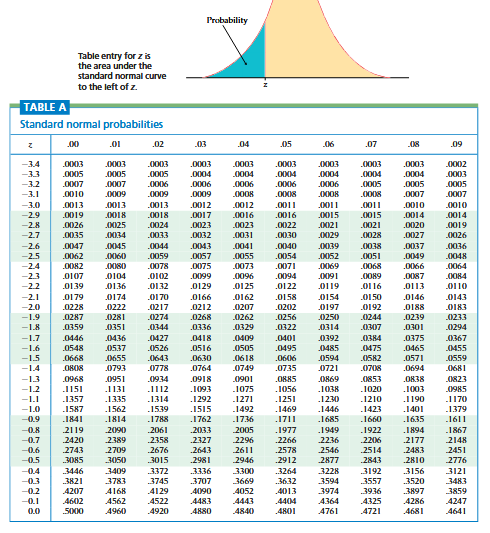





4) Distribuição T-student: Utilizando a biblioteca scipy.stats crie um dataframe para replicar a tabela da distribuição T-student:
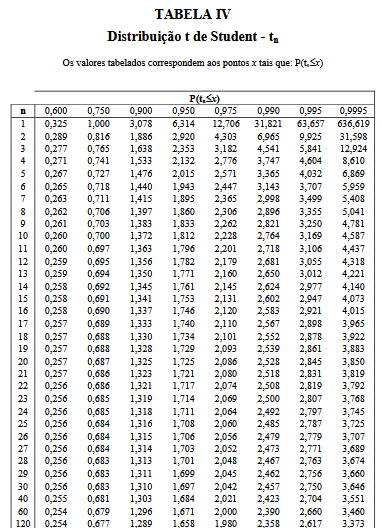

5) Considere uma distribuição Normal$(\mu=100,\sigma^2=9)$

* Gere aleatóriamente um conjunto de 100 valores
* Qual a proporção dos valores gerados que são menores que 98?
* Qual a probabilidade de valores menores que 98 considerando a distribuição Normal teórica? Compare os resultados e interprete
* Repita o mesmo procedimento mas agora com um conjunto aleatório de 1000 valores e compare os resultados obtidos e comente.

## Gráficos

- Fazer o gráficos (sobrepostos) da distribuição normal e distribuições t-student com 5, 10, 50 gl

Considere os dados de energia elétrica utilizados em aula anterior



In [12]:
import pandas as pd
dados = pd.read_csv("https://github.com/edunb01/dotfiles/raw/refs/heads/master/TarifaFornecimentoResidencial.csv",encoding="latin1")
dados.head()

,ideTarifaFornecimento,nomConcessao,SigDistribuidora,SigRegiao,VlrTUSDConvencional,VlrTEConvencional,VlrTotaTRFConvencional,VlrTRFBrancaPonta,VlrTRFBrancaIntermediaria,VlrTRFBrancaForaPonta,NumResolucao,DthInicioVigencia,DthProcessamento
0,315,Concessionária,AmE,N,0.41472,0.29134,0.70606,1.25504,0.84700,0.61792,2478/2018,01/11/2018 00:00:00,26/07/2019 00:00:00
1,316,Concessionária,Boa Vista,N,0.32810,0.30652,0.63462,1.25491,0.78768,0.52678,2479/2018,01/11/2018 00:00:00,26/07/2019 00:00:00
2,317,Permissionária,CASTRO - DIS,S,0.16845,0.16256,0.33101,0.53660,0.41108,0.28557,2477/2018,01/07/2018 00:00:00,26/07/2019 00:00:00
3,318,Concessionária,CEA,N,0.40338,0.16300,0.56638,1.23492,0.79378,0.46930,2495/2018,01/11/2018 00:00:00,26/07/2019 00:00:00
4,319,Concessionária,Ceal,NE,0.30413,0.23112,0.53525,1.12359,0.71562,0.45231,2540/2019,01/05/2019 00:00:00,26/07/2019 00:00:00


- Fazer histograma dos preços de VlrTUSDConvencional

- Fazer boxplot comparando preços de VlrTUSDConvencional 	 de concessionárias e permissionárias

- Preparar visualização para as diferentes regiões entre concessionárias e permissionárias - Quantitativos dos tipos e Comparação de preços VlrTUSDConvencional

- Comparar graficamente as médias e distribuições de preço da bandeira branca com os preços VlrTotaTRFConvencional

- Fazer um gráfico de dispersão com os valores VlrTotaTRFConvencional de cada empresa, mas com cores de cada região, linhas horizontais para médias de cada região e média geral